# Benchmark about the Sliding Window Maximum Problem

## Problem

Given an array A and an integer K. Find the maximum for each and every contiguous subarray of size K.

## Introduction

### Simple solution (trivial?)

The solutions to solve the problem were presented at the lecture of 16/09/2020, and the solutions presented are three, described below.

The simple (trivial) solution presented at the lesson use two **for**, and a C++ implementation is reported below

```cpp
std::vector<int> max_sub_array_naive_sol(const std::vector<int> &input, int size_sub_array)
{
    vector<int> max_values;
    max_values.reserve(input.size() - size_sub_array + 1);
    for (int i = 0; i <= input.size() - size_sub_array; i++) {
        int max_value = input.at(i);
        for (int j = 1; j < size_sub_array; j++) {
            if (max_value < input.at(i + j)) {
                max_value = input.at(i + j);
            }
        }
        max_values.push_back(max_value);
    }

    return max_values;
}
```

The cost of this algorithm is `O(N^2)` of computation, or a better description is `O(n*k)` because the internal for work only on sub array dimension. But in the wrost cases the algorithm cost is  `O(N^2)` when N = k.


### Balance Binary Tree solution (RbTree)

The second solution of the problem suggest to use the balance tree, and a C++ implementation is reported below:


>std::multiset is an associative container that contains a sorted set of objects of type Key. Unlike set, multiple keys with equivalent values are allowed. Sorting is done using the key comparison function Compare. Search, insertion, and removal operations have logarithmic complexity.


```cpp
std::vector<int> max_sub_array_bbst_sol(const std::vector<int> &input, int size_sub_array)
{
    std::vector<int> result;
    result.reserve(input.size() - size_sub_array + 1);
    std::multiset<int> balanced_tree;
    for (int i = 0; i < input.size(); i++) {
        balanced_tree.insert(input.at(i));
        if (i >= size_sub_array - 1) {
            if (i - size_sub_array >= 0) {
                balanced_tree.erase(balanced_tree.find(input.at(i - size_sub_array)));
            }
            int max_el = *balanced_tree.rbegin();
            result.push_back(max_el);
        }
    }
    return result;
}
```

The cost of this algorithm in terms of computation is  `O(n log n)`.


### FIFO solution (advanced)

The final solution proposes to use the FIFO queue to reduce the cost of the algorithm to linear time, and a C++ implementation is reported below

```cpp
std::vector<int> max_sub_array_deck_sol(const std::vector<int> &input, int size_sub_array)
{
    std::vector<int> result;
    result.reserve(input.size() - size_sub_array + 1);
    std::deque<int> priority_queue;
    for (int i = 0; i < input.size(); i++) {
        remove_minors_element(input, priority_queue, input.at(i));
        priority_queue.push_back(i);
        remove_element_out_sub_array( priority_queue, i, size_sub_array);
        if (i - (size_sub_array - 1) >= 0) {
            int max = input.at(priority_queue.front());
            result.push_back(max);
        }
    }
    return result;
}
```

Where the `remove_minors_element` and `remove_element_out_sub_array` are two utility functions reported below

```cpp
template<class T>
inline void remove_minors_element(const std::vector<int> &input, std::deque<T> &priority_queue, int new_element)
{
    while (!priority_queue.empty() && input[priority_queue.back()] <= new_element) {
        priority_queue.pop_back();
    }
}

template<class T>
inline void remove_element_out_sub_array(std::deque<T> &priority_queue, int actual_pos, int size_sub_array)
{
    while  (!priority_queue.empty() && actual_pos - size_sub_array >= priority_queue.front()) {
        priority_queue.pop_front();
    }
}
```

At this point, an interesting test test is to understend if the C++ STL makes the code slower that a pure C++ implementation of the structure, and a good test is to reproduce the second solution with a pure C++ implementation of RB Tree. The impelementation in analisis is called Red-Black-Tree, and it is available on Github at the following link https://github.com/anandarao/Red-Black-Tree.

The motivation to choose this implementation is the number of star on Github (38 stars), it help to assume that the implementation could tested from open-source community.

In additoon, the implementation of the solution is the same of the solution reported in the section about the description of "Balance Binary Tree solution".

The bechmark reported inside this document was made with [google benchmark](https://github.com/google/benchmark) to test the different implementation with the two solutions of a balanced tree implementation.

Footer Note: The RB Tree implementation report some bugs with some type of input, for this reason at the moment are reporting an old result with Rb Tree.

In [9]:
import pandas
import json
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from IPython.display import display_html

mpl.style.use('ggplot')


result_file = open('result.json', 'r')
result_tree_imp = open('bt_result.json', 'r')
result_old = open('result_old.json', 'r')

result_json = json.loads(result_file.read())
result_tree_json = json.loads(result_tree_imp.read())
result_old_json = json.loads(result_old.read())

bm_list = result_json['benchmarks']
bm_tree_list = result_tree_json['benchmarks']
bm_old = result_old_json['benchmarks']


## Bechmark balanced binary tree

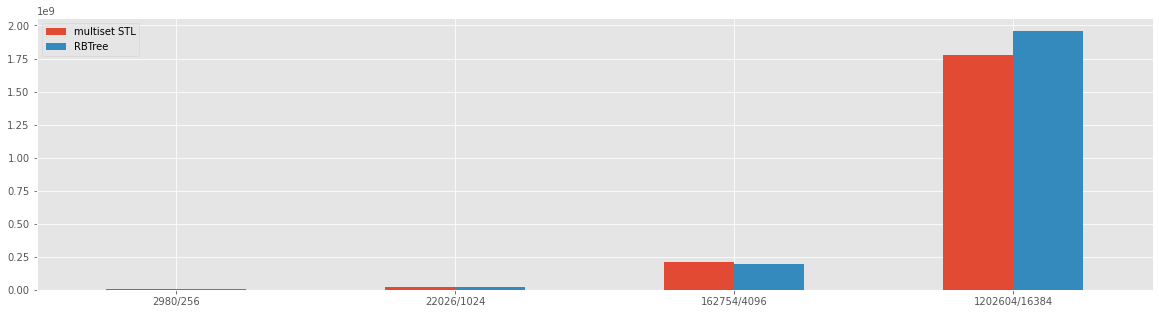

In [10]:
bm_rb_res = []
bm_stl_res = []
bm_input = []
bm_label = []
bm_stl_input = []
bm_stl_label = []
for bm in bm_old:
    if  'RB_Tree' in bm['run_name']:
        bm_rb_res.append(bm['real_time'])
        bm_input.append(bm['run_name'].split('/')[2])
        bm_label.append('{}/{}'.format(bm['run_name'].split('/')[2], bm['run_name'].split('/')[1]))
    elif 'Balance_Tree' in bm['run_name']:
        bm_stl_res.append(bm['real_time'])
        bm_stl_input.append(bm['run_name'].split('/')[1])

stl = pandas.DataFrame({
    'multiset STL': bm_stl_res,
    'RBTree': bm_rb_res
    }, index=bm_label)

stl.plot.bar(rot=0, figsize=(20,5))
bm_rb_res = []
bm_stl_res = []
bm_input = []
bm_label = []

The result looks like that the pure implementation is slower then the C++ multiset implementation, this result needs another proof to see if the c++ STL is faster than the pure implementation or the pure implementation need some addition analisis.

To proof if the C++ STL is more perfermed than the pure c++ implementation, the additional test is to made a benchmark of binary three implementation. In fact, the result below, shows that execution time of the insert operation on the set C++ STL strucutre and a Binary thee pure C++ implementation.

<AxesSubplot:>

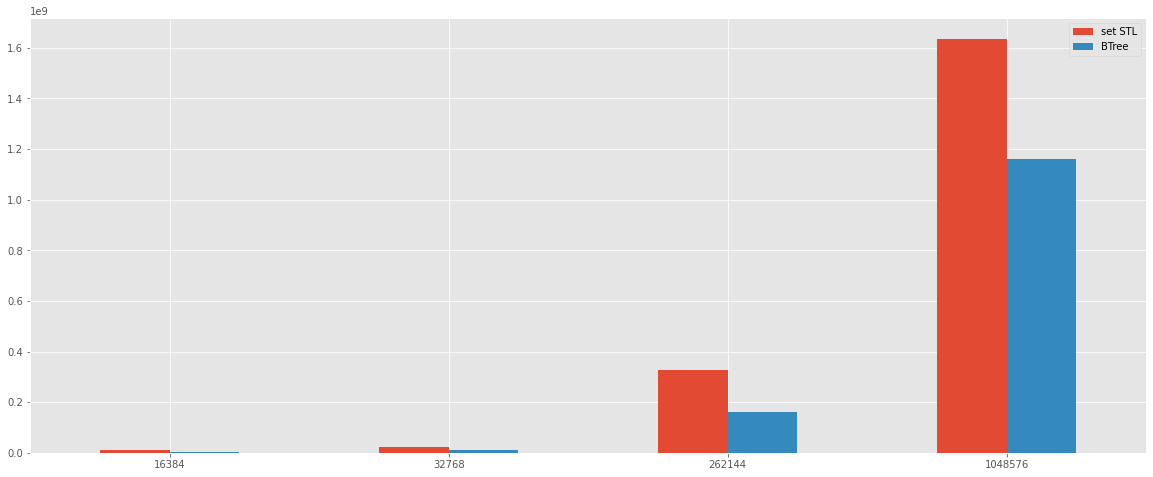

In [11]:
bm_bt_res = []
bm_stl_res = []
bm_input = []
bm_label = []
bm_stl_input = []
for bm in bm_tree_list:
    if  'BM_STL' in bm['run_name']:
        bm_stl_res.append(bm['real_time'])
        bm_input.append(bm['run_name'].split('/')[1])
        bm_label.append(bm['run_name'].split('/')[1])
    else:
        bm_bt_res.append(bm['real_time'])
        bm_input.append(bm['run_name'].split('/')[1])
        
stl = pandas.DataFrame({
    'set STL': bm_stl_res,
    'BTree': bm_bt_res
    }, index=bm_label)

stl.plot.bar(rot=0, figsize=(20,8))

The result shows that the insert on pure C++ binary tree is more quickly than the insert on set from C++ STL. I can assume that on pure Red and Black tree implementation reported above could have some performans leaks on the balance operation.

Foot Note: The implementation of pure C++ implementation of Binary Tree in not available on Github yet (Coming soon).

## Comparison between solutions proposed at the lesson.

<AxesSubplot:>

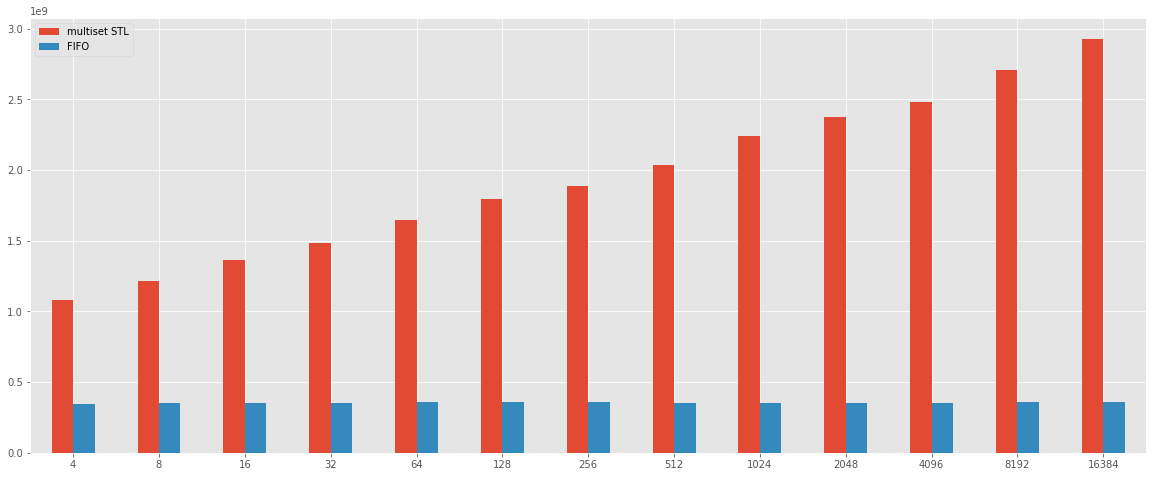

In [12]:
bm_stl_res = []
bm_fifo_res = []
bm_naive_res = []
bm_stl_input = []
bm_fifo_input = []
bm_naive_input = []
bm_label = []
for bm in bm_list:
    if 'Balance_Tree' in bm['run_name']:
        bm_stl_res.append(bm['real_time'])
        bm_stl_input.append(bm['run_name'].split('/')[1])
        bm_label.append(bm['run_name'].split('/')[1])
    elif 'FIFO' in bm['run_name']:
        bm_fifo_res.append(bm['real_time'])
        bm_fifo_input.append(bm['run_name'].split('/')[1])
    elif 'NAIVE_SOL' in bm['run_name']:
        bm_naive_res.append(bm['real_time'])
        bm_naive_input.append(bm['run_name'].split('/')[1])

summary = pandas.DataFrame({
    'multiset STL': bm_stl_res,
    'FIFO': bm_fifo_res
    }, index=bm_label)

summary.plot.bar(rot=0, figsize=(20,8))


The simple solution can not be inside the chart above because the difference about the time is very hight, and the result is reported inside the chart below.

<AxesSubplot:>

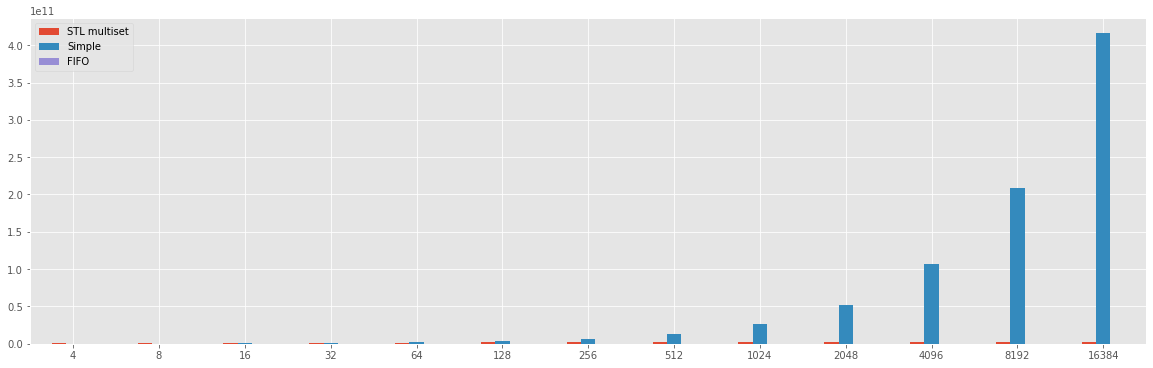

In [13]:
summary = pandas.DataFrame({
    'STL multiset': bm_stl_res,
    'Simple': bm_naive_res,
    'FIFO': bm_fifo_res
    }, index=bm_label)

summary.plot.bar(rot=0, figsize=(20,6))

In [14]:
table = {
    'FIFO': bm_fifo_res,
    'SLT': bm_stl_res,
    'Simple': bm_naive_res
}

df1 = pandas.DataFrame(data=table, index=bm_label)

col = [df1]

html_str=''
for df in col:
    html_str+=df.to_html()
display_html(html_str.replace('table','table style="display:inline"'),raw=True)

,FIFO,SLT,Simple
4,3.440008e+08,1.080195e+09,1.833814e+08
8,3.505077e+08,1.218484e+09,3.276240e+08
16,3.526658e+08,1.365307e+09,5.892686e+08
32,3.546191e+08,1.485389e+09,1.055331e+09
64,3.585962e+08,1.644734e+09,1.895299e+09
128,3.562465e+08,1.793159e+09,3.547022e+09
256,3.620313e+08,1.888812e+09,6.860013e+09
512,3.551575e+08,2.035680e+09,1.337457e+10
1024,3.501699e+08,2.244666e+09,2.642430e+10
2048,3.524418e+08,2.376910e+09,5.259802e+10


## Conclusion

A conclusion is that the solutions give a different result for different dimensions of k and N, in addition, the solution with the FIFO is very fast, and this benchmark gives us the proof. However, from the benchmark with the Red and black tree is possible noted some result that needs more analisis to see if is possible do better than the C++ STL.

Foter note 1: The benchmarks code can be optimized, because each benchmark uses a different input with the same size and same value of k but the valude generate by rand() function.


Foter note 2: To generate the value of K and N inside the benchmark are used two different exponential functions such as:

- K = 2^i, with i = [1:14]

- N = 2^21 